# Clase 7 - Reconocimiento de Patrones en Imagenes

En esta clase se estudian las características de textura en imágenes mediante el uso de la matriz de co-ocurrencia de niveles de gris (GLCM) y la normalización de intensidades.

- **GLCM (Gray Level Co-occurrence Matrix):** Es una herramienta estadística que describe cómo se distribuyen los pares de valores de intensidad en una imagen, considerando una distancia y dirección específicas. Permite extraer propiedades como contraste, correlación, homogeneidad y energía, útiles para distinguir texturas.
- **Características de textura:** Se calculan a partir de la GLCM y permiten cuantificar patrones repetitivos, rugosidad y uniformidad en regiones de la imagen.
- **Normalización de intensidades:** Consiste en ajustar los valores de los píxeles a un rango definido, facilitando la comparación entre imágenes y la extracción de características.

El código implementa estos conceptos para analizar imágenes sintéticas y reales, mostrando cómo extraer y visualizar propiedades de textura relevantes para el reconocimiento de patrones.

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from sklearn.preprocessing import MinMaxScaler

img= [[0, 0, 1, 0, 1, 2],
	[1, 0, 0, 1, 0, 3],
	[3, 1, 0, 0, 1, 1],
	[2, 2, 2, 1, 3, 0],
	[1, 0, 3, 0, 2, 2],
	[3, 0, 1, 2, 3, 1]]

l = 4

img = np.array(img, dtype=np.uint8)

P_0_1 = graycomatrix(img, distances=[1], angles=[0], levels=l)
P_90_1 = graycomatrix(img, distances=[1], angles=[np.pi/4], levels=l)

print(P_0_1.reshape(l, l))
print()
print(P_90_1.reshape(l, l))


[[3 5 1 2]
 [5 1 2 1]
 [0 1 3 1]
 [3 2 0 0]]

[[5 3 0 2]
 [2 3 2 1]
 [2 1 0 1]
 [0 0 3 0]]


25
245


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

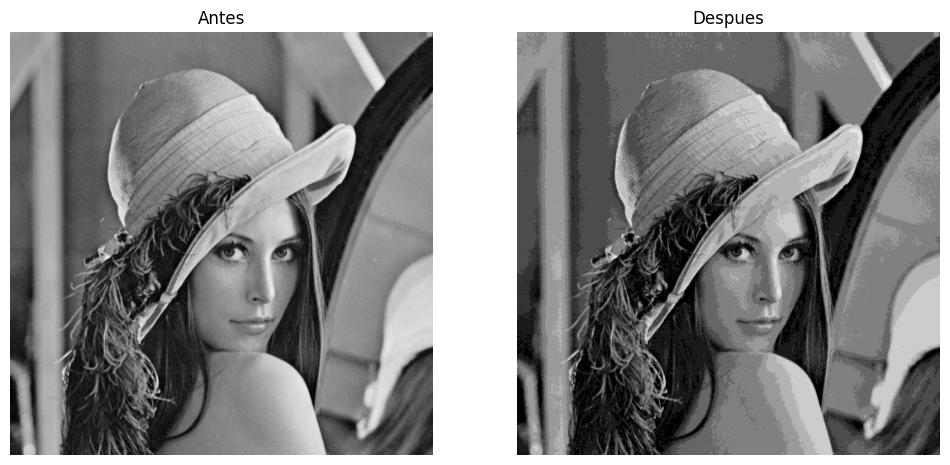

In [ ]:
im = cv2.imread('IMG/lena.png')
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Convertir la imagen en una columna
columna = gray.reshape(-1, 1)

print(np.min(gray))
print(np.max(gray))


Escala = (0,10)

# Normalizar la columna
resultado = MinMaxScaler(Escala).fit_transform(columna).astype(int)

resultado = resultado.reshape(gray.shape)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Antes')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resultado, cmap='gray')
plt.title('Despues')
plt.axis('off')


In [33]:

im = cv2.imread('IMG/textura_1.tif')
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
columna =  gray.reshape(-1,1)

# parte del codigo donde modificamos
# los niveles de intensidad
nueva_escala =  (0,10)
niveles = max(nueva_escala)+1

resultado = MinMaxScaler(nueva_escala).fit_transform(columna).astype(int)
resultado = resultado.reshape(gray.shape)


#calculamos la matriz de co-ocurrencia
comat =graycomatrix(resultado, angles=[0],distances=[1], levels=niveles)


features = ['contrast','correlation', 'dissimilarity','homogeneity','ASM','energy']
S = []
    # para cada imagen extraemos las caracteristicas definidas en la lista features
for ft in features:
    sts = graycoprops(comat, ft).squeeze()
    S.append(float(sts))

print(S)

[1.3830439223697653, 0.6326350996421385, 0.8725740551583248, 0.6141866065197195, 0.058592417269294615, 0.24205870624560194]
